## Importing Libraries

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import plotly.figure_factory as ff
from pickle import dump

In [40]:
# importing dataset
dataset = pd.read_csv('Student Data.csv', skiprows = 23, na_values = '?')

In [41]:
dataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1


In [42]:
# Checking shape of the dataset
dataset.shape

(1437, 15)

In [43]:
# Naming the columns
dataset.columns=["First Term Gpa","Second Term Gpa","First Language","Funding","School","FastTrack","Coop","Residency","Gender","Previous Education","Age Group","High School Average Mark","Math Score","English Grade","FirstYearPersistence"]

In [44]:
dataset.head()

,First Term Gpa,Second Term Gpa,First Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1


In [45]:
# here we can see thar we have 1546 missing value
dataset.isnull().sum()

First Term Gpa               17
Second Term Gpa             160
First Language              111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous Education            4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

In [46]:
dataset['School'].value_counts()

6    1437
Name: School, dtype: int64

In [47]:
# Impute the first gpa using the average of the First Gpa
def impute_First_gpa(row):
    if pd.isnull(row['First Term Gpa']):
        avg_gpa = dataset['First Term Gpa'].mean()
        return avg_gpa
    else:
        return row['First Term Gpa']

dataset['First Term Gpa'] = dataset.apply(impute_First_gpa, axis=1)

In [48]:
# Impute the first gpa using the average of the First Gpa
def impute_second_gpa(row):
    if pd.isnull(row['Second Term Gpa']):
        avg_gpa = dataset['Second Term Gpa'].mean()
        return avg_gpa
    else:
        return row['Second Term Gpa']

dataset['Second Term Gpa'] = dataset.apply(impute_second_gpa, axis=1)


In [49]:
# create the mode for the first language
lang_mode=dataset['First Language'].mode()[0]

In [50]:
# impute the First language using the mode
dataset['First Language'] = dataset['First Language'].fillna(lang_mode)

In [51]:
# after imputing againg checking the missing value and now it is 0 First Language column
dataset.isnull().sum()

First Term Gpa                0
Second Term Gpa               0
First Language                0
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous Education            4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

In [52]:
#drop the dataset which has the null value in the Previous Education
dataset = dataset.dropna(subset=['Previous Education'])

In [53]:
#impute the math score using the average
dataset['Math Score']=dataset['Math Score'].fillna(dataset['Math Score'].mean())

In [54]:
#impute the English score using the average
dataset['English Grade']=dataset['English Grade'].fillna(dataset['English Grade'].mean())

In [55]:
# drop the High schoolo mark columns because of the high missing values
dataset.drop(columns='High School Average Mark',inplace=True)

In [56]:
# check the null values in the dataset
dataset.isnull().sum()

First Term Gpa          0
Second Term Gpa         0
First Language          0
Funding                 0
School                  0
FastTrack               0
Coop                    0
Residency               0
Gender                  0
Previous Education      0
Age Group               0
Math Score              0
English Grade           0
FirstYearPersistence    0
dtype: int64

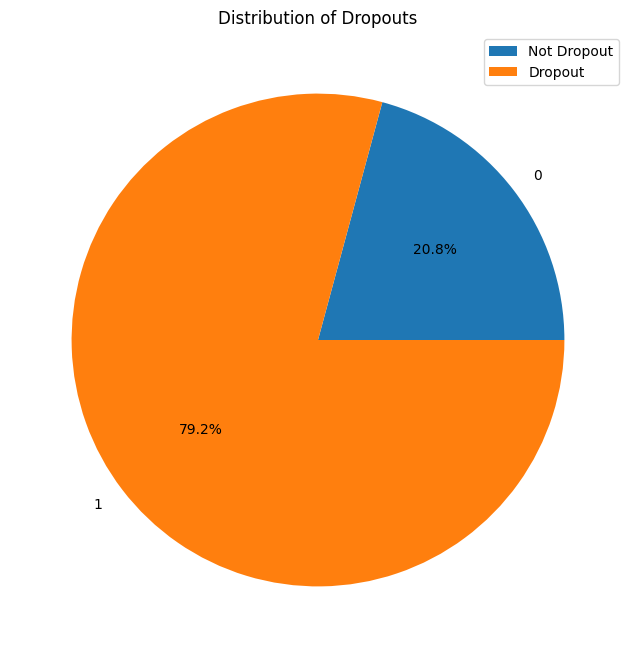

In [57]:
# checking distribution of out target column
value_counts = dataset['FirstYearPersistence'].value_counts(ascending=True)

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.legend(['Not Dropout','Dropout'])
plt.title('Distribution of Dropouts')
plt.show()

<Axes: xlabel='First Term Gpa', ylabel='Second Term Gpa'>

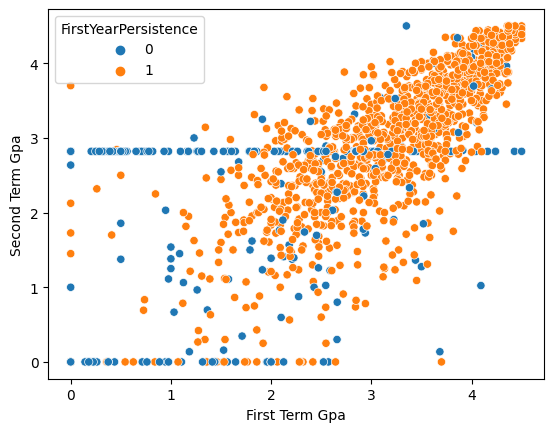

In [58]:
# vizulizing the 1st and 2nd term GPA with respect to first year persistence
sns.scatterplot(dataset,x='First Term Gpa',y='Second Term Gpa',hue='FirstYearPersistence')

In [59]:
# comparision of different features with our target column
# 1- not drop out
# 0- drop out
import plotly.express as px

categorical_vars = ["Funding", "School", "FastTrack", "Coop", "Residency", "Gender", "Previous Education", "Age Group"]

for cat_var in categorical_vars:
    fig = px.histogram(dataset, x=cat_var, color="FirstYearPersistence", title=f'Bar Plot of {cat_var} vs FirstYearPersistence',
                       labels={cat_var: cat_var, "FirstYearPersistence": "FirstYearPersistence"},
                       barmode='group')
    fig.update_layout(xaxis=dict(type='category'), legend_title_text='FirstYearPersistence')
    fig.show()


<Axes: xlabel='FirstYearPersistence', ylabel='Math Score'>

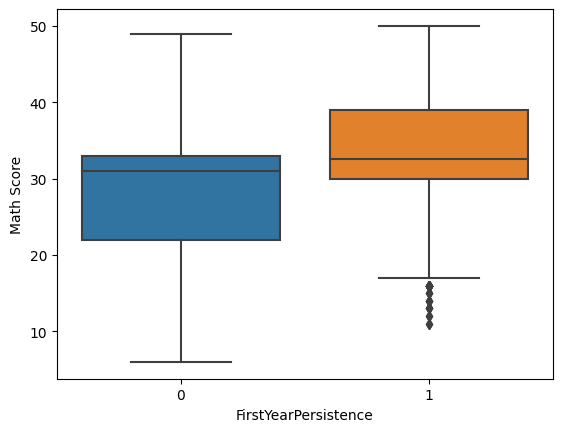

In [60]:
# creating the box plot that shows the higher scrore of maths less dropout
sns.boxplot(dataset,x='FirstYearPersistence',y='Math Score')

<Axes: xlabel='FirstYearPersistence', ylabel='Second Term Gpa'>

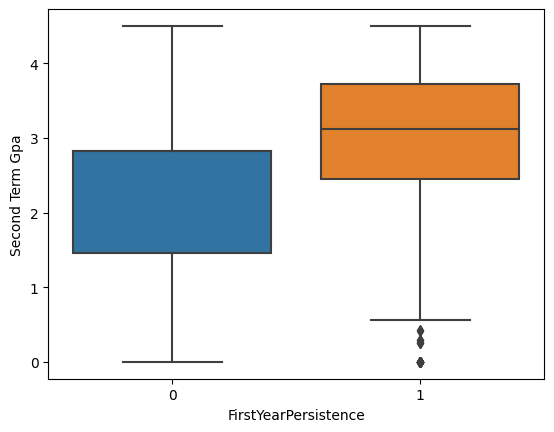

In [61]:
# creating the box plot that shows the higher scrore of Second year gpa less dropout
sns.boxplot(dataset,x='FirstYearPersistence',y='Second Term Gpa')

<Axes: xlabel='FirstYearPersistence', ylabel='First Term Gpa'>

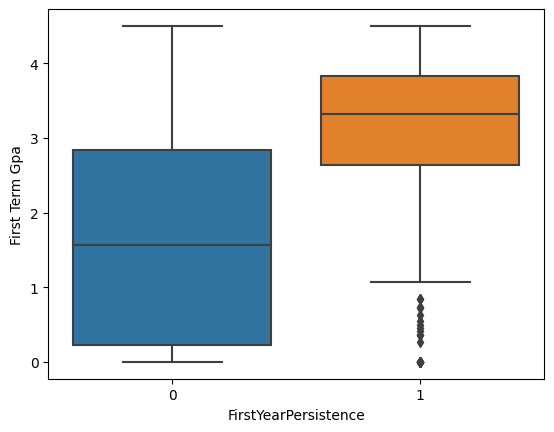

In [62]:
# creating the box plot that shows the higher scrore of First year gpa less dropout
sns.boxplot(dataset,x='FirstYearPersistence',y='First Term Gpa')

In [63]:
# here we are droping school column because it contains almost same values
dataset.drop(columns='School',inplace=True)

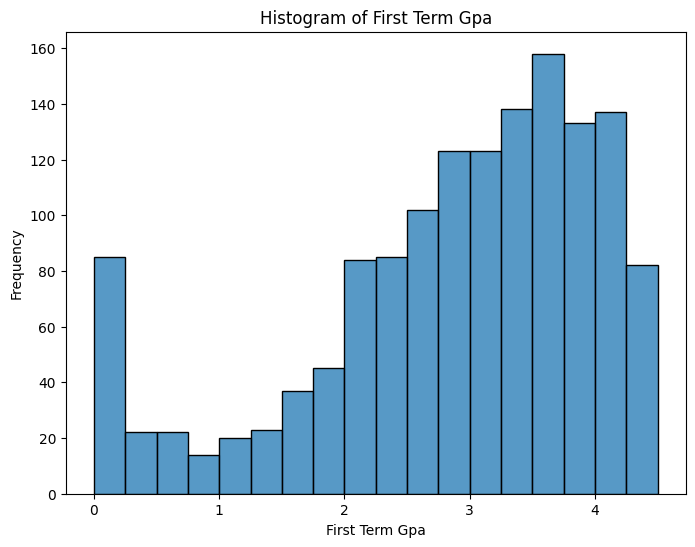

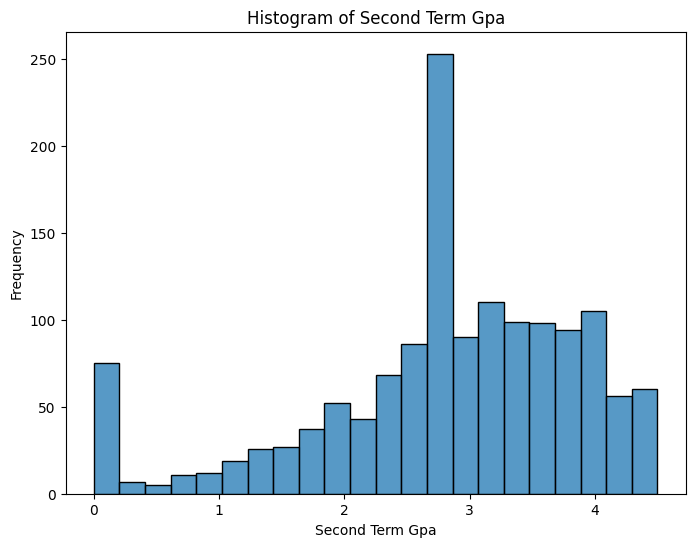

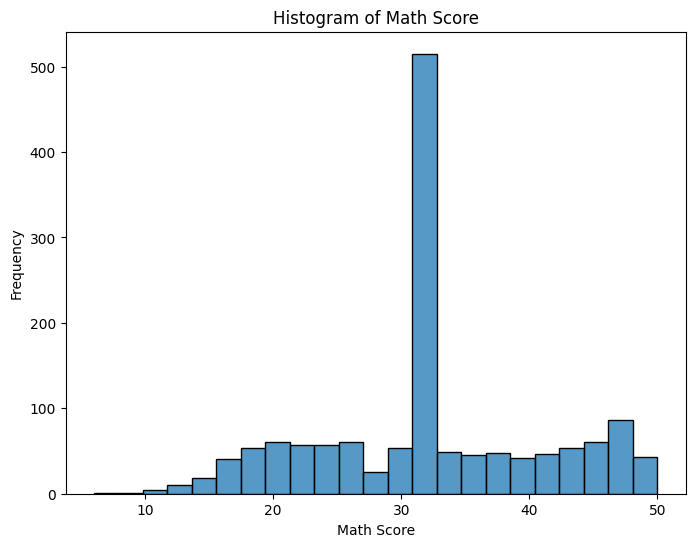

In [64]:
# vizulizing the "First Term Gpa", "Second Term Gpa", "Math Score" columns
continuous_vars = ["First Term Gpa", "Second Term Gpa", "Math Score"]

for cont_var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[cont_var])
    plt.title(f'Histogram of {cont_var}')
    plt.xlabel(cont_var)
    plt.ylabel('Frequency')
    plt.show()


In [65]:
# finding correlation between the dataset
 
correlation_matrix = dataset.corr()
 
fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                   x=list(correlation_matrix.columns),
                                   y=list(correlation_matrix.index),
                                   colorscale='RdBu',
                                   annotation_text=correlation_matrix.values.round(2),
                                   showscale=True)
fig.update_layout(title='Correlation Heatmap',
      xaxis=dict(
        title='Features',
        side='bottom'  
    ),
    yaxis_title='Features',
                width=1000, height=800)
fig.show()

In [66]:
dataset.columns

Index(['First Term Gpa', 'Second Term Gpa', 'First Language', 'Funding',
       'FastTrack', 'Coop', 'Residency', 'Gender', 'Previous Education',
       'Age Group', 'Math Score', 'English Grade', 'FirstYearPersistence'],
      dtype='object')

In [67]:
# droping our target columns and storing it into y variable
X=dataset.drop(columns='FirstYearPersistence')
y=dataset['FirstYearPersistence']

In [68]:
# splitting our dataset set for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [69]:
# applying deep nueral network to train our dataset
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [70]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [71]:
# model training
model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.1)

Epoch 1/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5017 - accuracy: 0.7886 - val_loss: 0.4546 - val_accuracy: 0.8087
Epoch 2/50
33/33 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8167 - val_loss: 0.4112 - val_accuracy: 0.8348
Epoch 3/50
33/33 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8390 - val_loss: 0.4228 - val_accuracy: 0.8261
Epoch 4/50
33/33 [==============================] - 0s 1ms/step - loss: 0.3884 - accuracy: 0.8438 - val_loss: 0.3820 - val_accuracy: 0.8783
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8497 - val_loss: 0.4032 - val_accuracy: 0.8435
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8613 - val_loss: 0.3894 - val_accuracy: 0.8696
Epoch 7/50
33/33 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8594 - val_loss: 0.4202 - val_accuracy: 0.7913
Epoch 8/50
33/33 [==

In [72]:
# Finding train loss and accuracy.
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train Accuracy: { train_accuracy }')

36/36 [==============================] - 0s 675us/step - loss: 0.3584 - accuracy: 0.8709
Train Accuracy: 0.8708551526069641


In [73]:
# Finding test loss and accuracy.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: { test_accuracy }')

9/9 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8537
Test Accuracy: 0.8536585569381714


# Model Deployment

In [74]:
# Opening a file for dumping the model using Pickle.
file = open('neural_network_model.pkl', 'wb')

In [76]:
# Dumping the model.
dump(model, file)

In [77]:
# Closing the file after dumping.
file.close()